# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from requests.exceptions import HTTPError

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

588

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Unit format
unit_format = "imperial"
# API point, the { city_name } parameter will added for each city 
url = "http://api.openweathermap.org/data/2.5/weather?units=" + unit_format + "&APPID=" + api_key + "&q=" 
# Results array
city_data = []

print("----------------");
print("Fetch Data Begin");
print("----------------");

# Loop through all the cities in our list
for city in cities:
    print("Processing request for " + city)
    try:
        # Create a request to the API point
        res = requests.get(url+city);

        # Raise an HTTPError if recieved an error status
        res.raise_for_status();

        # Parse the JSON data
        result = res.json();

        # Append the City information into city_data list
        city_data.append({  "City": city,
                            "Lat": result["coord"]["lat"], 
                            "Lng": result["coord"]["lon"], 
                            "Max Temp": result["main"]["temp_max"],
                            "Humidity": result["main"]["humidity"],
                            "Cloudiness": result["clouds"]["all"],
                            "Wind Speed": result["wind"]["speed"],
                            "Country": result["sys"]["country"],
                            "Date": result["dt"] })

    # Handle status coder error
    except HTTPError:
      print("Response status code error. Skipping city...")
      pass

    # Handle error if missing data
    except KeyError:
      print("Data does not have sufficient information. Skipping city...")
      pass
    else:
      print("Fetched the data.")
print("-------------------");
print("Fetch Data Complete");
print("-------------------");

----------------
Fetch Data Begin
----------------
Processing request for taolanaro
Response status code error. Skipping city...
Processing request for asau
Response status code error. Skipping city...
Processing request for avarua
Fetched the data.
Processing request for belushya guba
Response status code error. Skipping city...
Processing request for rikitea
Fetched the data.
Processing request for pacific grove
Fetched the data.
Processing request for ushuaia
Fetched the data.
Processing request for talawdi
Response status code error. Skipping city...
Processing request for namibe
Fetched the data.
Processing request for illoqqortoormiut
Response status code error. Skipping city...
Processing request for la ronge
Fetched the data.
Processing request for adrar
Fetched the data.
Processing request for lebu
Fetched the data.
Processing request for khasan
Fetched the data.
Processing request for green river
Fetched the data.
Processing request for barrow
Fetched the data.
Processing req

Fetched the data.
Processing request for yar-sale
Fetched the data.
Processing request for mantua
Fetched the data.
Processing request for pokosnoye
Fetched the data.
Processing request for barawe
Response status code error. Skipping city...
Processing request for ferrol
Fetched the data.
Processing request for khonuu
Response status code error. Skipping city...
Processing request for hasaki
Fetched the data.
Processing request for cidreira
Fetched the data.
Processing request for nokaneng
Fetched the data.
Processing request for butaritari
Fetched the data.
Processing request for natchitoches
Fetched the data.
Processing request for lata
Fetched the data.
Processing request for garowe
Fetched the data.
Processing request for naryan-mar
Fetched the data.
Processing request for lorengau
Fetched the data.
Processing request for chokurdakh
Fetched the data.
Processing request for halifax
Fetched the data.
Processing request for honningsvag
Fetched the data.
Processing request for bethanie

Fetched the data.
Processing request for aguimes
Fetched the data.
Processing request for sinjar
Fetched the data.
Processing request for launceston
Fetched the data.
Processing request for shingu
Fetched the data.
Processing request for ternate
Fetched the data.
Processing request for katherine
Fetched the data.
Processing request for saint-pierre
Fetched the data.
Processing request for bahia blanca
Fetched the data.
Processing request for corrales
Fetched the data.
Processing request for kindu
Fetched the data.
Processing request for longyearbyen
Fetched the data.
Processing request for xapuri
Fetched the data.
Processing request for bengkulu
Response status code error. Skipping city...
Processing request for agva
Response status code error. Skipping city...
Processing request for aklavik
Fetched the data.
Processing request for clarence town
Fetched the data.
Processing request for jinchang
Fetched the data.
Processing request for antibes
Fetched the data.
Processing request for la

Fetched the data.
Processing request for luanda
Fetched the data.
Processing request for thai nguyen
Fetched the data.
Processing request for uglovskoye
Fetched the data.
Processing request for medina
Fetched the data.
Processing request for davlekanovo
Fetched the data.
Processing request for tamworth
Fetched the data.
Processing request for zawiyat susah
Response status code error. Skipping city...
Processing request for yerbogachen
Fetched the data.
Processing request for anadyr
Fetched the data.
Processing request for stavern
Fetched the data.
Processing request for shellbrook
Fetched the data.
Processing request for rawson
Fetched the data.
Processing request for ransang
Response status code error. Skipping city...
Processing request for abonnema
Fetched the data.
Processing request for roebourne
Fetched the data.
Processing request for cheremisinovo
Fetched the data.
Processing request for cuenca
Fetched the data.
Processing request for shache
Fetched the data.
Processing request

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Export the results from the API into a csv file
city_data_pd.to_csv(output_data_file, index_label="City_ID")

# Extract relevant fields from the DataFrame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# Show Record Count
city_data_pd.count()

City          519
Cloudiness    519
Country       519
Date          519
Humidity      519
Lat           519
Lng           519
Max Temp      519
Wind Speed    519
dtype: int64

In [7]:
# Display the City Data Frame
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,avarua,92,CK,1552351887,100,-21.21,-159.78,79.74,21.07
1,rikitea,68,PF,1552351888,100,-23.12,-134.97,77.62,12.57
2,pacific grove,1,US,1552351823,54,36.62,-121.92,64.99,9.17
3,ushuaia,40,AR,1552348800,70,-54.81,-68.31,44.60,25.28
4,namibe,8,AO,1552351888,100,-15.19,12.15,78.12,11.45


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

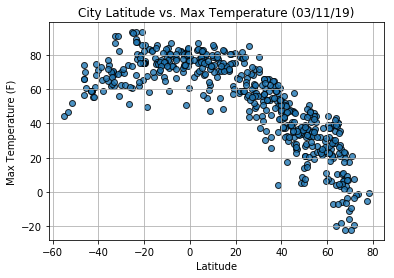

In [8]:
# Build scatter plot for latitude vs. Temperature
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

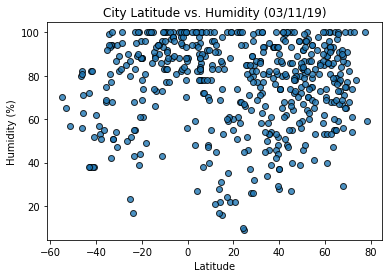

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
# plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

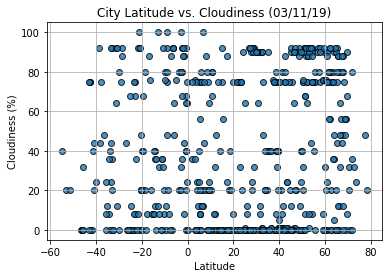

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

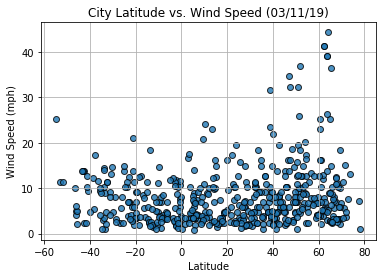

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()